# World Happiness Report

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv"
df = pd.read_csv(url)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.shape

(158, 12)

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<AxesSubplot:>

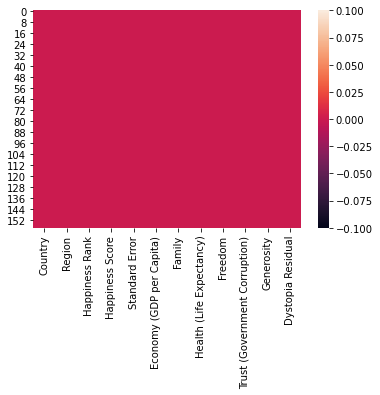

In [8]:
sns.heatmap(df.isna())

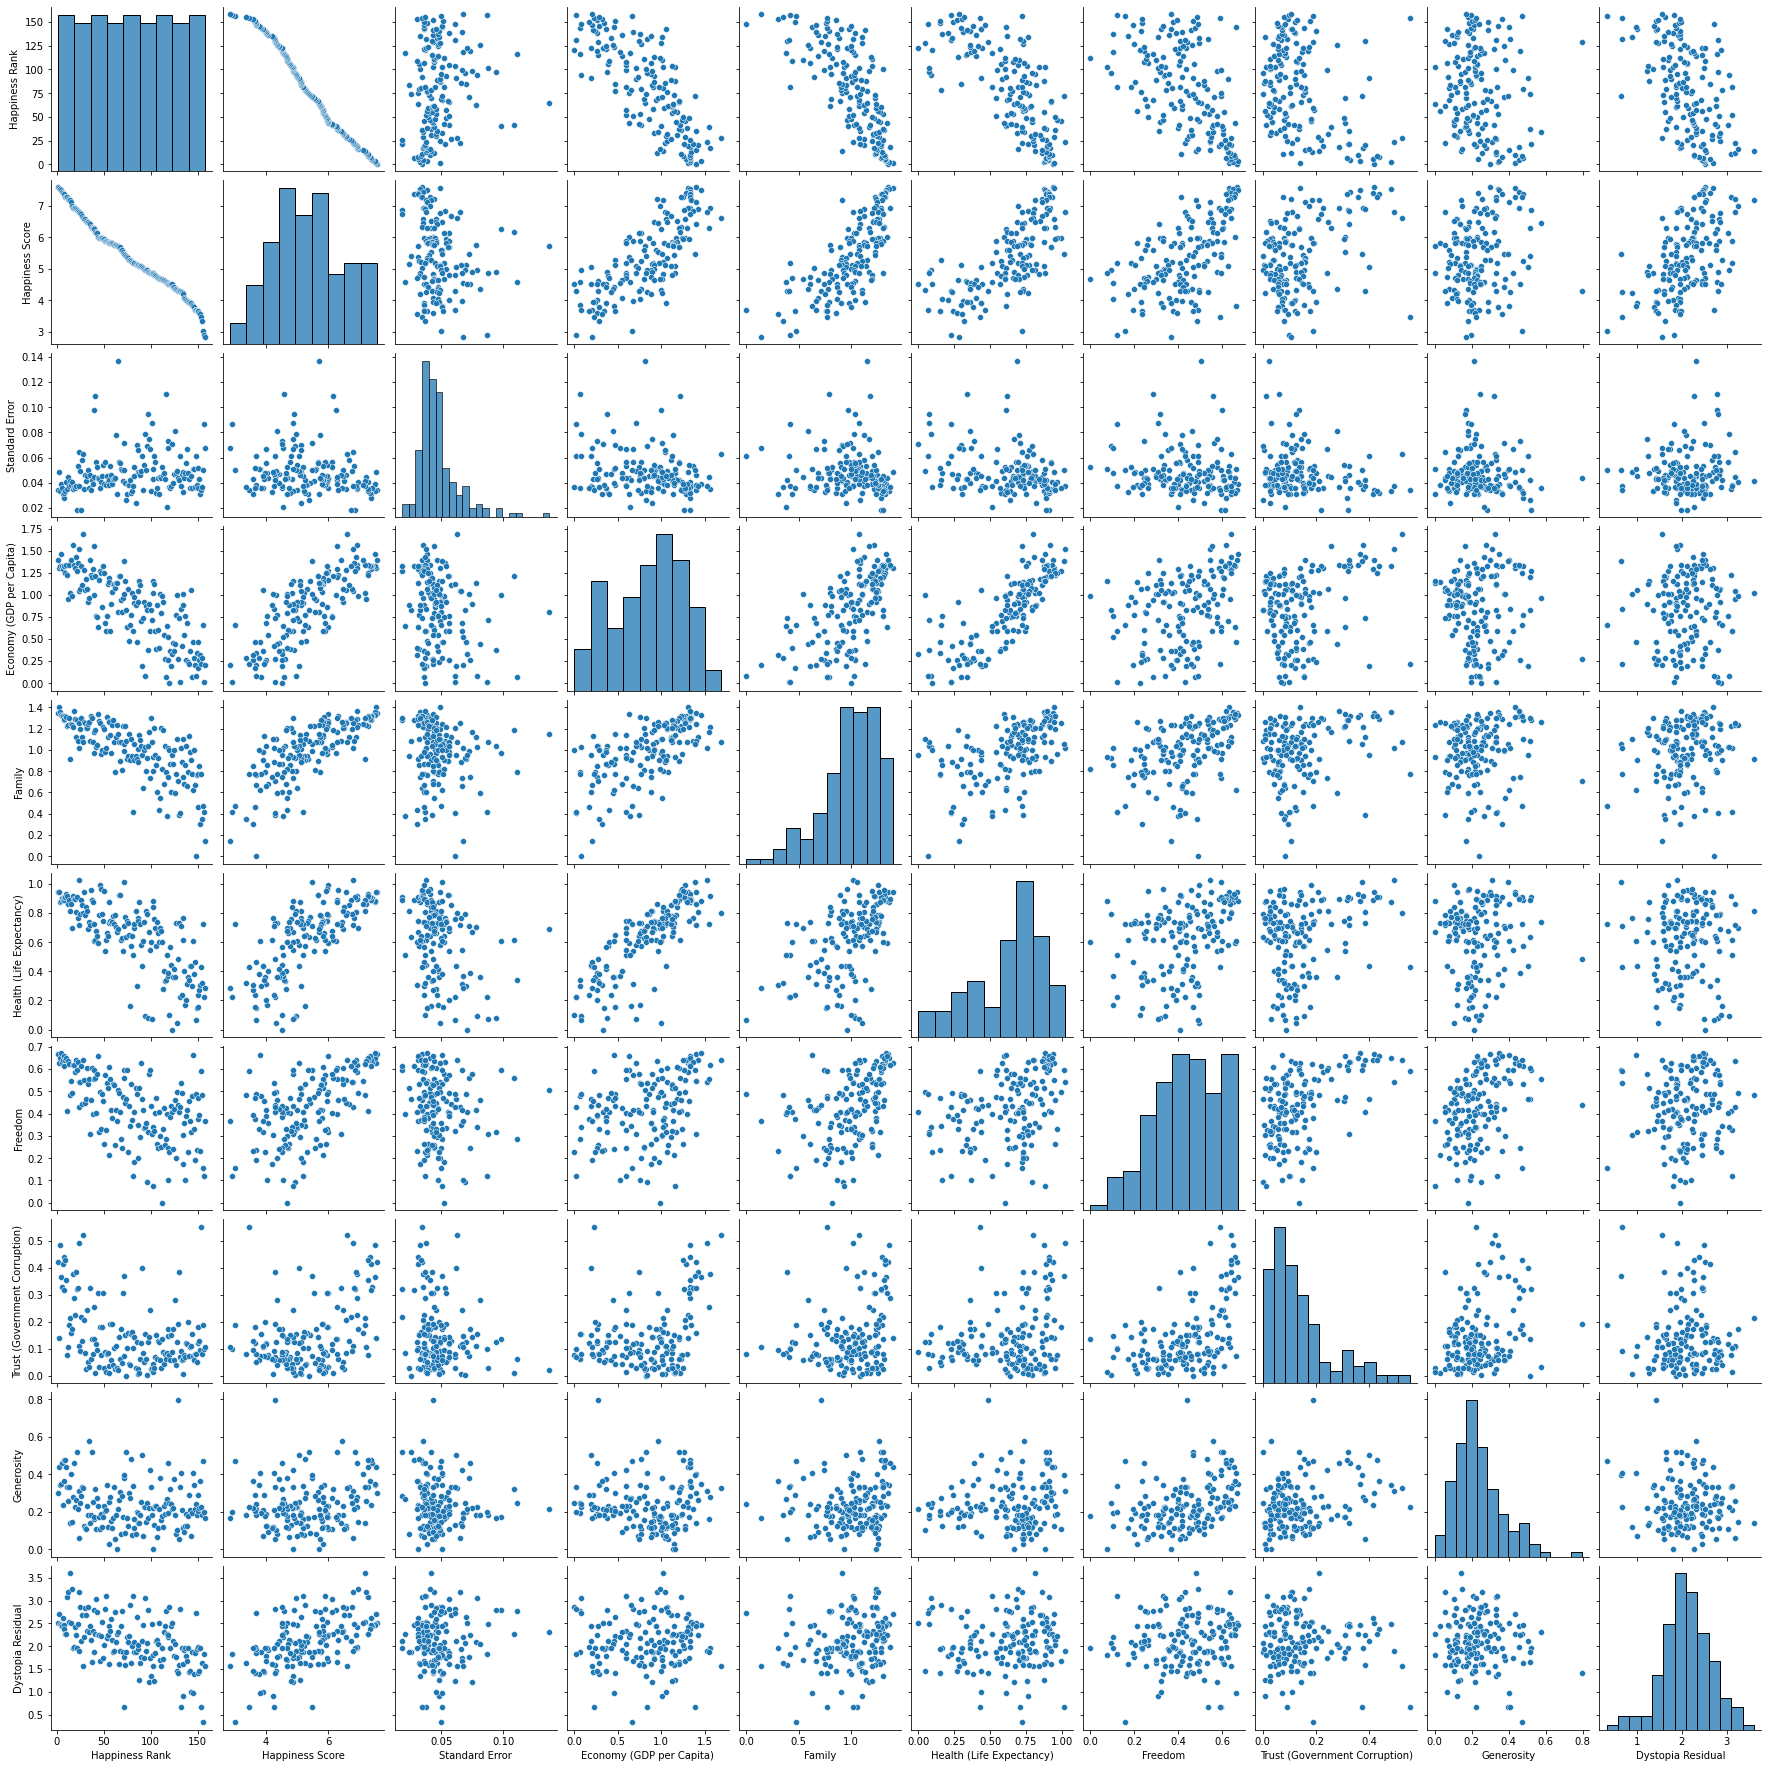

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.preprocessing import LabelEncoder

cols = ['Country', 'Region']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<AxesSubplot:xlabel='Happiness Rank', ylabel='Dystopia Residual'>

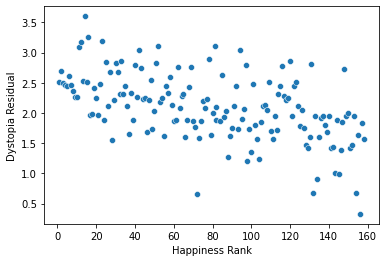

In [11]:
sns.scatterplot(x= 'Happiness Rank', y='Dystopia Residual', data = df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

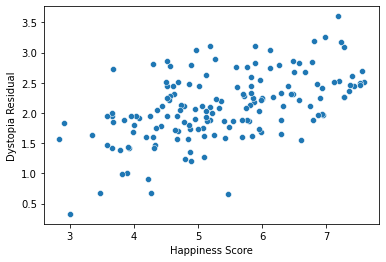

In [12]:
sns.scatterplot(x= 'Happiness Score', y='Dystopia Residual', data = df)

<AxesSubplot:xlabel='Standard Error', ylabel='Dystopia Residual'>

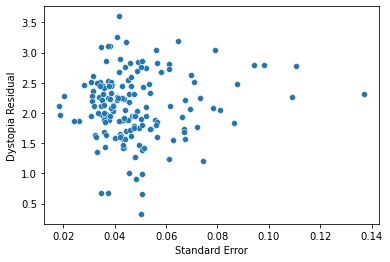

In [13]:
sns.scatterplot(x= 'Standard Error', y= 'Dystopia Residual', data =df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Dystopia Residual'>

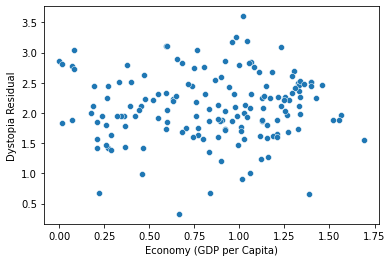

In [14]:
sns.scatterplot(x= 'Economy (GDP per Capita)', y = 'Dystopia Residual', data = df)

<AxesSubplot:xlabel='Family', ylabel='Dystopia Residual'>

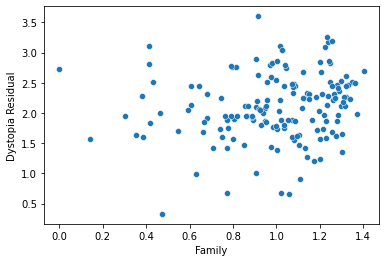

In [15]:
sns.scatterplot( x= 'Family', y= 'Dystopia Residual', data = df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Dystopia Residual'>

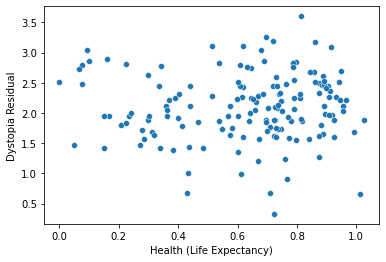

In [16]:
sns.scatterplot(x = 'Health (Life Expectancy)', y = 'Dystopia Residual', data = df)

<AxesSubplot:xlabel='Freedom', ylabel='Dystopia Residual'>

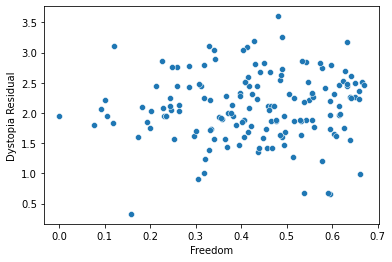

In [17]:
sns.scatterplot(x = 'Freedom', y ='Dystopia Residual', data = df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Dystopia Residual'>

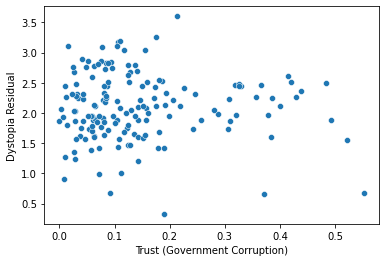

In [18]:
sns.scatterplot(x='Trust (Government Corruption)', y= 'Dystopia Residual', data = df)

<AxesSubplot:xlabel='Generosity', ylabel='Dystopia Residual'>

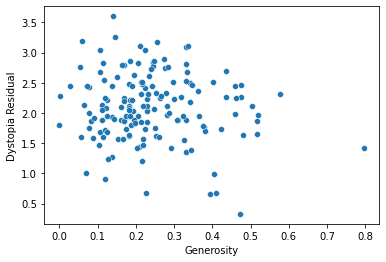

In [19]:
sns.scatterplot(x = 'Generosity', y = 'Dystopia Residual', data = df)

In [20]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

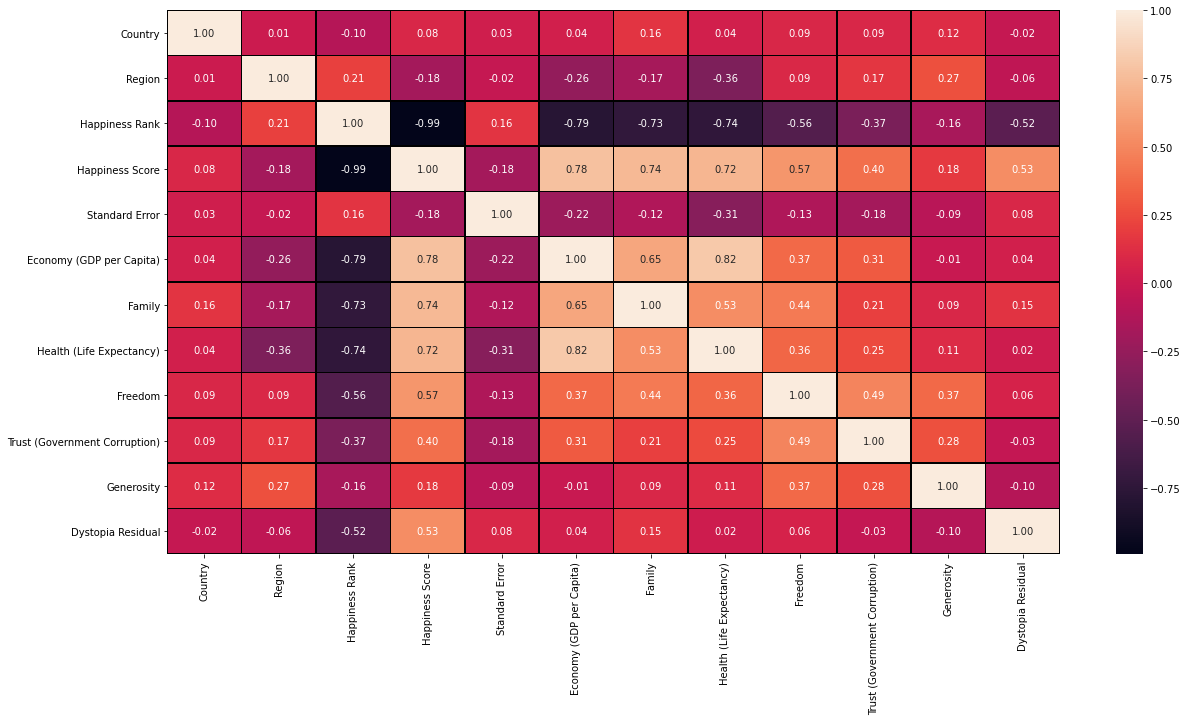

In [21]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor= 'black', fmt= '.2f')

In [22]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


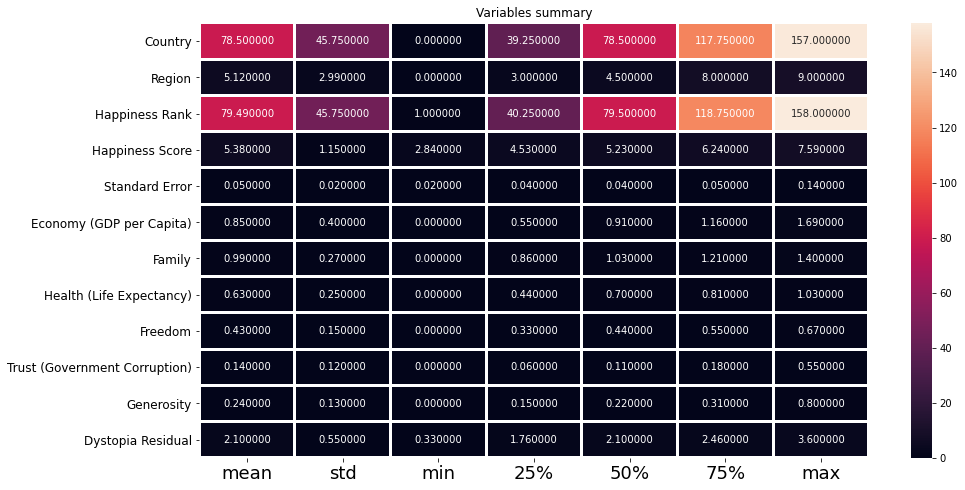

In [23]:
plt.figure(figsize = (15,8))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot = True,fmt = 'f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# skewness

In [24]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

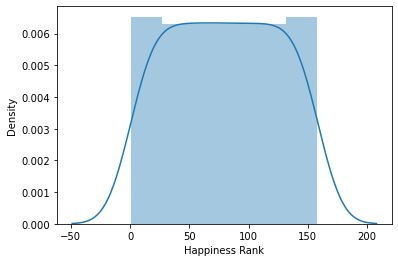

In [25]:
sns.distplot(df['Happiness Rank'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

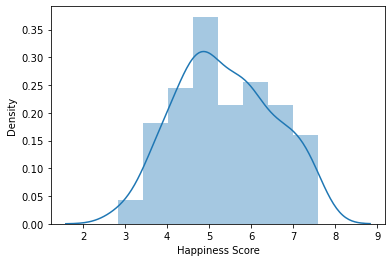

In [26]:
sns.distplot(df['Happiness Score'])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

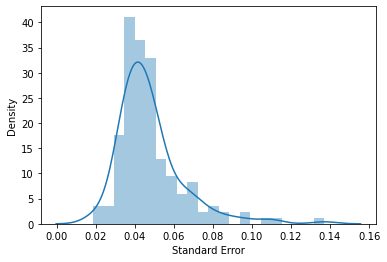

In [27]:
sns.distplot(df['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

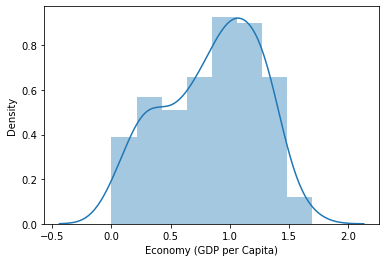

In [28]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

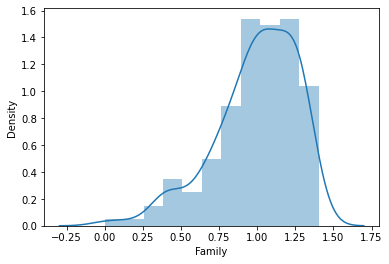

In [29]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

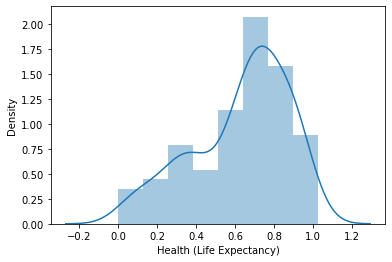

In [30]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

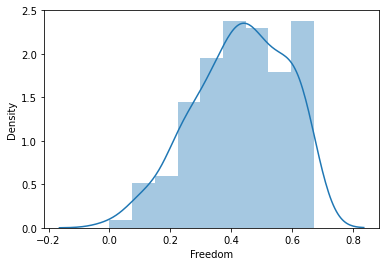

In [31]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

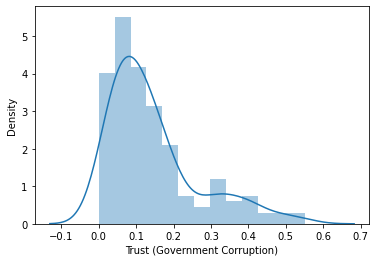

In [32]:
sns.distplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

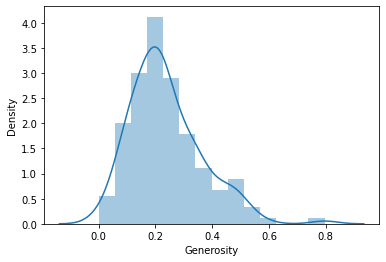

In [33]:
sns.distplot(df['Generosity'])

# Checking Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x17a575f52e0>,
 'caps': [<matplotlib.lines.Line2D at 0x17a575f59a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a575e7f40>],
 'medians': [<matplotlib.lines.Line2D at 0x17a576020a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a57602400>],
 'means': []}

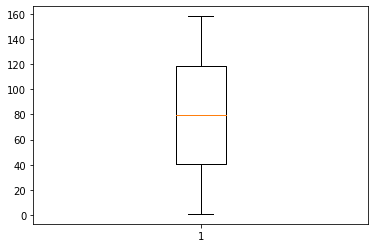

In [34]:
plt.boxplot(x = 'Happiness Rank', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a5764bc70>,
 'caps': [<matplotlib.lines.Line2D at 0x17a57659370>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a5764b910>],
 'medians': [<matplotlib.lines.Line2D at 0x17a57659a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a57659d90>],
 'means': []}

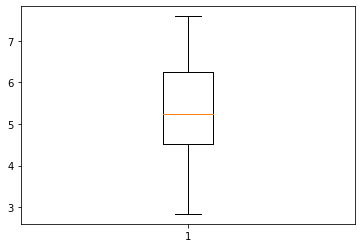

In [35]:
plt.boxplot(x = 'Happiness Score', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a576ae340>,
 'caps': [<matplotlib.lines.Line2D at 0x17a576aea00>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a5769ffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x17a576bb100>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a576bb460>],
 'means': []}

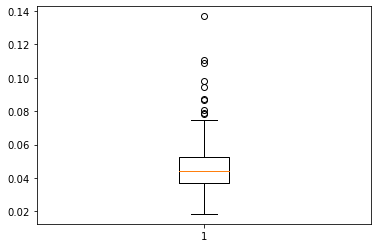

In [36]:
plt.boxplot(x = 'Standard Error', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a5770c370>,
 'caps': [<matplotlib.lines.Line2D at 0x17a5770ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a5770c070>],
 'medians': [<matplotlib.lines.Line2D at 0x17a586e6130>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a586e6490>],
 'means': []}

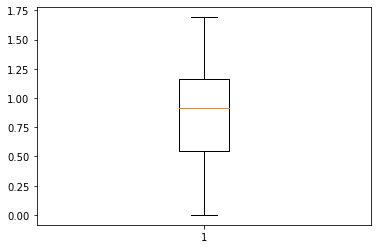

In [37]:
plt.boxplot(x = 'Economy (GDP per Capita)', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a58732850>,
 'caps': [<matplotlib.lines.Line2D at 0x17a58732f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a587324f0>],
 'medians': [<matplotlib.lines.Line2D at 0x17a58740610>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a58740970>],
 'means': []}

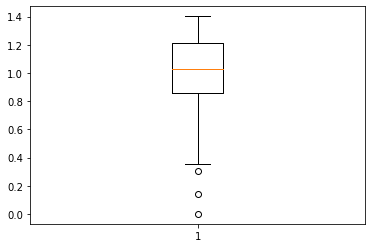

In [38]:
plt.boxplot(x = 'Family', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a5878bd60>,
 'caps': [<matplotlib.lines.Line2D at 0x17a5879b460>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a5878ba00>],
 'medians': [<matplotlib.lines.Line2D at 0x17a5879bb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a5879be80>],
 'means': []}

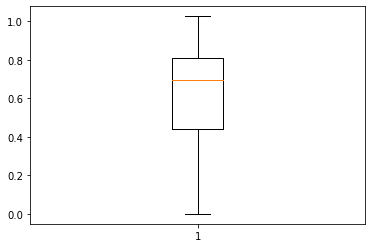

In [39]:
plt.boxplot(x= 'Health (Life Expectancy)', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a587eb8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x17a587ebfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a587eb580>],
 'medians': [<matplotlib.lines.Line2D at 0x17a587f66a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a587f6a00>],
 'means': []}

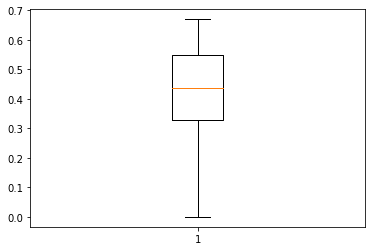

In [40]:
plt.boxplot(x = 'Freedom', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a555274c0>,
 'caps': [<matplotlib.lines.Line2D at 0x17a567d20a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a5677c1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x17a567cde80>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a567e1e50>],
 'means': []}

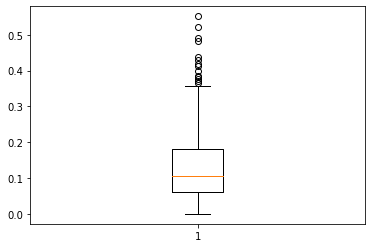

In [41]:
plt.boxplot(x= 'Trust (Government Corruption)', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a569749d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17a569202b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a56974a90>],
 'medians': [<matplotlib.lines.Line2D at 0x17a56e90d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a56e90b20>],
 'means': []}

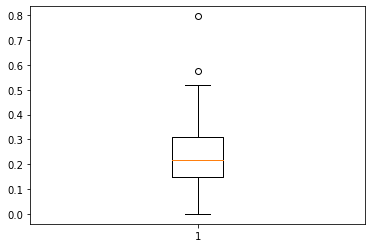

In [42]:
plt.boxplot(x= 'Generosity', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a569f8b50>,
 'caps': [<matplotlib.lines.Line2D at 0x17a56a0baf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a569f8340>],
 'medians': [<matplotlib.lines.Line2D at 0x17a56a0b1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a569f3280>],
 'means': []}

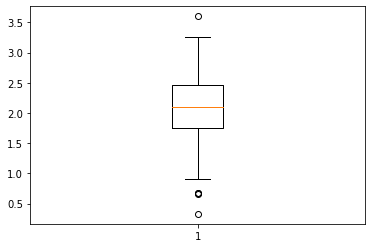

In [43]:
plt.boxplot(x= 'Dystopia Residual', data = df)

In [44]:
zscores = stats.zscore(df)

In [45]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_cleaned_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Country                          78.500000
Region                            5.000000
Happiness Rank                   78.500000
Happiness Score                   1.717750
Standard Error                    0.015032
Economy (GDP per Capita)          0.612640
Family                            0.357582
Health (Life Expectancy)          0.371828
Freedom                           0.220762
Trust (Government Corruption)     0.118580
Generosity                        0.159330
Dystopia Residual                 0.703005
dtype: float64


In [46]:
len(df)-len(df_cleaned_iqr)

32

In [47]:
# there are 9 outliers are are sucessfully removed

In [48]:
df_cleaned_iqr.skew()

Country                          0.142200
Region                           0.027379
Happiness Rank                  -0.018211
Happiness Score                  0.217857
Standard Error                   0.478133
Economy (GDP per Capita)        -0.418441
Family                          -0.704866
Health (Life Expectancy)        -0.755316
Freedom                         -0.392531
Trust (Government Corruption)    1.082193
Generosity                       0.689359
Dystopia Residual                0.159596
dtype: float64

In [49]:
q = df_cleaned_iqr['Trust (Government Corruption)'].quantile(0.99)

df_cleaned = df_cleaned_iqr[df['Trust (Government Corruption)']<q]

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

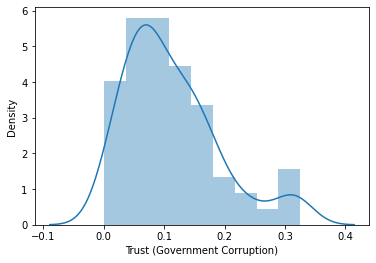

In [50]:
sns.distplot(df_cleaned['Trust (Government Corruption)'])

In [51]:
df_cleaned.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
10,64,4,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,33,3,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,7,9,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320


<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

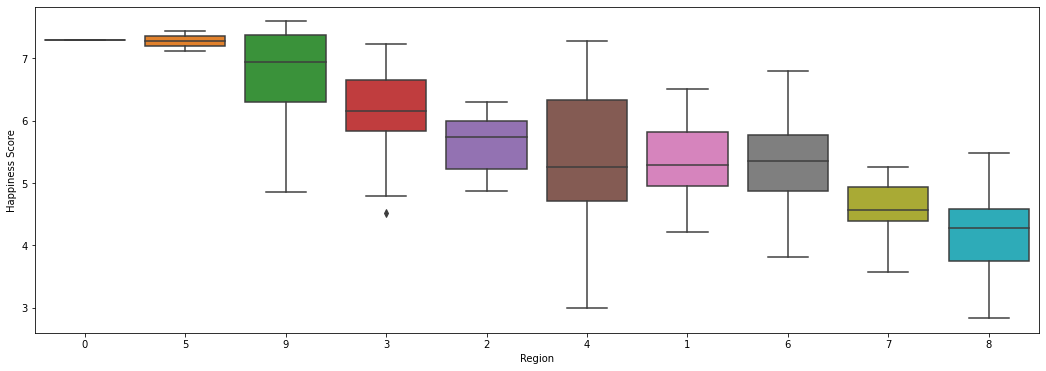

In [52]:
# let's get the avg happiness rank across thhere 10 regions
plt.figure(figsize=(18,6))
region_order_wrt_score = df.groupby('Region').agg({'Happiness Score':'mean'}).sort_values('Happiness Score',ascending=False).index
sns.boxplot(df.Region,df['Happiness Score'],order=region_order_wrt_score)

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

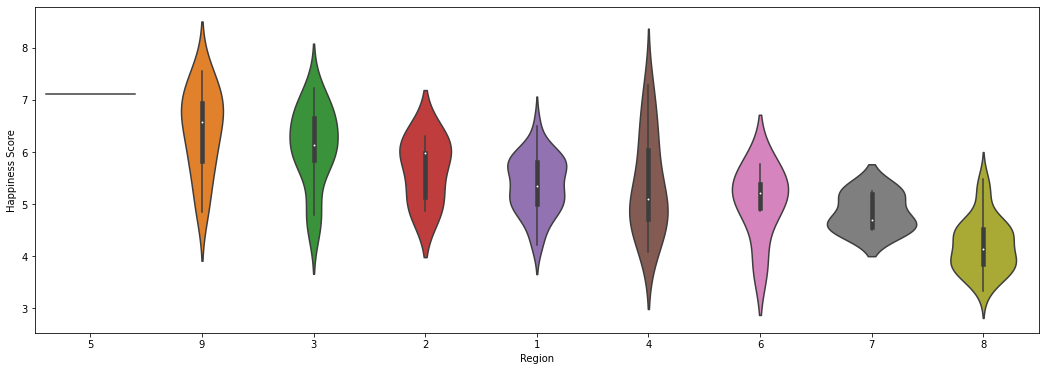

In [53]:
plt.figure(figsize=(18,6))
region_order_wrt_score = df_cleaned.groupby('Region').agg({'Happiness Score':'mean'}).sort_values('Happiness Score',ascending=False).index
sns.violinplot(df_cleaned.Region,df_cleaned['Happiness Score'],order=region_order_wrt_score)

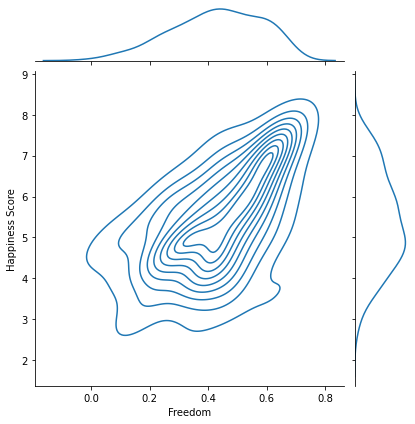

In [54]:
# freedom vs hapiness
sns.jointplot(df.Freedom,df['Happiness Score'],kind='kde')

In [55]:
# let's get the correlation of the features with each other
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

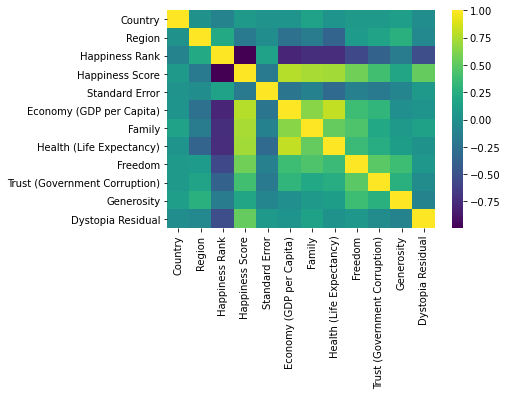

In [56]:
# get a heatmap
sns.heatmap(df.corr(),cmap='viridis')

In [57]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,45,9,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,134,9,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,100,0,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [58]:
# the most generous 10 countries.
df.sort_values('Generosity',ascending=False)[:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
128,97,6,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805
33,140,6,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
20,149,9,21,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994
36,88,9,37,6.302,0.04206,1.20740,1.30203,0.88721,0.60365,0.13586,0.51752,1.64880
73,60,6,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399
90,126,8,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
78,14,7,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
8,100,0,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [59]:
# Let's build a regression model for this data which would predict the Happiness score

In [60]:
df_cleaned.corr()['Happiness Score']

Country                          0.068277
Region                          -0.215895
Happiness Rank                  -0.993832
Happiness Score                  1.000000
Standard Error                  -0.142301
Economy (GDP per Capita)         0.744362
Family                           0.686464
Health (Life Expectancy)         0.729401
Freedom                          0.471353
Trust (Government Corruption)    0.340093
Generosity                       0.170226
Dystopia Residual                0.565825
Name: Happiness Score, dtype: float64

In [61]:
# We should drop the column as it's almost perfectly correalted to the target
df_cleaned.drop('Happiness Rank',1,inplace=False)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
6,99,9,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
10,64,4,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,33,3,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,7,9,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
...,...,...,...,...,...,...,...,...,...,...,...
148,26,8,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,53,8,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,66,8,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [62]:
# X and y split
X = df_cleaned.drop('Happiness Score',1)
y = df_cleaned['Happiness Score']

In [63]:
X.shape,y.shape

((124, 11), (124,))

In [64]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

# check size 
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((83, 11), (83,), (41, 11), (41,))

In [65]:
# standard scaling on the feautres
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(np.expand_dims(y_train,1))
y_test = sc.fit_transform(np.expand_dims(y_test,1))

In [66]:
# Importing the training dependencies
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR

In [67]:
# Import Tuning Dependencies
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [68]:
# Import the Evaluation Dependenies
from sklearn.metrics import r2_score,mean_squared_error

In [69]:
def train_n_ret_r2score(model):
    """
    Input the model and get the r2 score in return.
    """
    model.fit(X_train,y_train.ravel())
    
    return r2_score(y_test,model.predict(X_test))

def train_n_mse(model):
    """
    Input the model and get the mse in return.
    """
    model.fit(X_train,y_train.ravel())
    
    return mse(y_test,model.predict(X_test))

def get_avg_cv_score(model):
    """
    Input the model and get the average cv score with scoring param:'r2' on the complete dataset with 10 Folds.
    """
    return np.mean(cross_val_score(model,X,y,cv=KFold(10,shuffle=True,random_state=42)))

In [70]:
train_n_ret_r2score(LinearRegression())

0.983848722799706

In [71]:
get_avg_cv_score(LinearRegression())

0.99999987784868

In [72]:
best_model = LinearRegression()
best_model.fit(X_train,y_train)
best_model.score(X_test,y_test)

# getting the pred values
best_y_preds = best_model.predict(X_test)

In [73]:
cross_val_score(best_model,X,y,cv=KFold(10,shuffle=True))

array([0.99999986, 0.99999992, 0.9999999 , 0.99999982, 0.99999983,
       0.99999992, 0.99999993, 0.99999993, 0.99999995, 0.99999995])

In [74]:
np.mean(cross_val_score(best_model,X,y,cv=KFold(10,shuffle=True)))

0.9999998813377505

In [75]:
mean_squared_error(y_test,best_y_preds)

0.016151277200293978

Linear model is giving us the 96 percent on the r2 score..and moreover its giving a perfect CVscore on the 10 Fold Cross Validation data.

In [76]:
# comparing the true and the predicted results
list(zip(sc.inverse_transform(y_test.ravel()),sc.inverse_transform(best_y_preds.ravel())))


[(6.937, 7.140284656909969),
 (5.5889999999999995, 5.717991915837683),
 (5.791, 5.93099642630777),
 (6.295, 6.462714794714077),
 (5.192, 5.300284674142578),
 (4.507, 4.577749429331637),
 (5.399, 5.517651813443064),
 (4.633, 4.710827600857581),
 (6.94, 7.143223684147489),
 (3.9560000000000004, 3.9962988546693765),
 (6.853, 7.051185912468397),
 (5.013, 5.111127117570302),
 (4.512, 4.5830161077359755),
 (5.689, 5.823662157875566),
 (4.686, 4.765673913826329),
 (7.278, 7.498938765981848),
 (4.436, 4.502237566684718),
 (4.715, 4.796697532321504),
 (6.3020000000000005, 6.470669352846686),
 (5.7589999999999995, 5.897306957385816),
 (5.332000000000001, 5.448033496259921),
 (4.61, 4.685839089336175),
 (4.55, 4.62362303570498),
 (5.194, 5.301611791720936),
 (6.574, 6.757237951107568),
 (5.984, 6.134689305032281),
 (3.8960000000000004, 3.933906718069884),
 (6.75, 6.942765620418278),
 (5.9479999999999995, 6.097340942271195),
 (4.885, 4.975734866958563),
 (6.122999999999999, 6.281288039870317),
 (3

<AxesSubplot:>

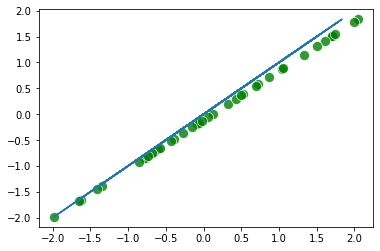

In [77]:
plt.plot(y_test,y_test)

sns.scatterplot(best_y_preds.ravel(),y_test.ravel(),color='g',s=100,alpha=0.8)